<a href="https://colab.research.google.com/github/macorony/ConvNet_Examples/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet architecture

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# gpu available or not
print("GPU is available:", torch.cuda.is_available())

GPU is available: False


In [3]:
transform = transforms.Compose([transforms.ToTensor()])

In [4]:
train_set = torchvision.datasets.FashionMNIST('./data/fashion', train=True, transform=transform, download = True)
test_set = torchvision.datasets.FashionMNIST('./data/fashion', train=False, transform=transform, download=True)

In [5]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True, num_workers=2)

tensor([9, 4, 5, 5, 8, 2, 7, 4, 6, 9, 2, 3, 7, 7, 8, 5, 9, 9, 5, 7, 6, 3, 3, 3,
        5, 7, 3, 0, 2, 8, 1, 0, 3, 9, 8, 0, 0, 4, 8, 7, 8, 8, 3, 8, 6, 8, 8, 9,
        6, 8, 3, 4, 3, 4, 2, 8, 2, 5, 9, 1, 7, 8, 2, 0])


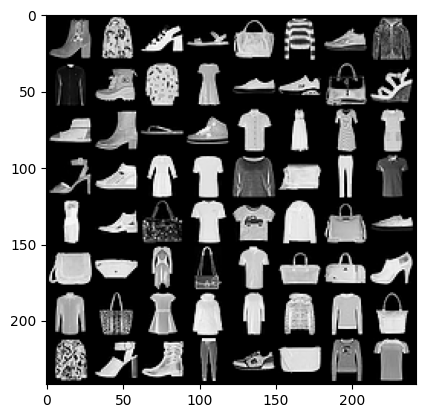

In [33]:
# Visulize
images, labels = next(iter(train_loader))
print(labels)
grid = torchvision.utils.make_grid(images)
plt.imshow(grid.permute(1,2,0))


In [36]:
# define LeNet in 2 ways
class LeNet_1(nn.Module):
  def __init__(self):
    super(LeNet_1, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0)
    self.pooling = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
    self.fc1 = nn.Linear(256, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x):
    x = self.pooling(F.relu(self.conv1(x)))
    x = self.pooling(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
LeNet_1 = LeNet_1()

In [38]:
class LeNet_2(nn.Module):
  def __init__(self):
    super(LeNet_2, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.fc1 = nn.Linear(256, 120)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(120, 84)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x)
    out = self.fc3(x)
    return out
LeNet_2 = LeNet_2()


In [39]:
# Define a loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer_1 = optim.SGD(LeNet_1.parameters(), lr=0.001, momentum=0.9)
optimizer_2 = optim.SGD(LeNet_2.parameters(), lr=0.001, momentum=0.9)

In [42]:
# Training loop
last_loss = 0
running_loss = 0
for i, data in enumerate(train_loader):

  inputs, labels = data
  optimizer_1.zero_grad()
  outputs = LeNet_1(inputs)
  loss = loss_func(outputs, labels)
  loss.backward()
  optimizer_1.step()

  running_loss += loss
  if i % 100 == 99:
    last_loss = running_loss
    print(f"The loss is {last_loss}.")
    running_loss = 0

print('Finish Training')



The loss is 80.04004669189453.
The loss is 78.77857208251953.
The loss is 74.99960327148438.
The loss is 71.9298095703125.
The loss is 74.49727630615234.
The loss is 69.86029052734375.
The loss is 72.05267333984375.
The loss is 70.23429107666016.
The loss is 69.96517944335938.
Finish Training


938

In [31]:
2999 % 2000

999

In [22]:
1%3

1

In [23]:
10 % 3

1